In [13]:
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence
from gensim.models.phrases import Phrases, Phraser
import gensim
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import logging
import os
import argparse
import re
import pickle
from tqdm import tqdm

import nltk
from nltk.corpus import stopwords

In [2]:
with open('data/paper_data.pkl', 'rb') as f:
    data = pickle.load(f)

In [3]:
data.__len__()

13202

In [5]:
doc_lengths = np.array(list(map(len, data)))

In [6]:
word_stats = {'average':[np.mean(doc_lengths)],'minimum':[min(doc_lengths)],'maximum':[max(doc_lengths)], 'median':[np.median(doc_lengths)], 'total':[sum(doc_lengths)], 'std':[np.std(doc_lengths)]}

In [8]:
stats = pd.DataFrame.from_dict(word_stats)
stats

,average,minimum,maximum,median,total,std
0,28852.663915,0,1678408,25473.5,380912869,31234.579918


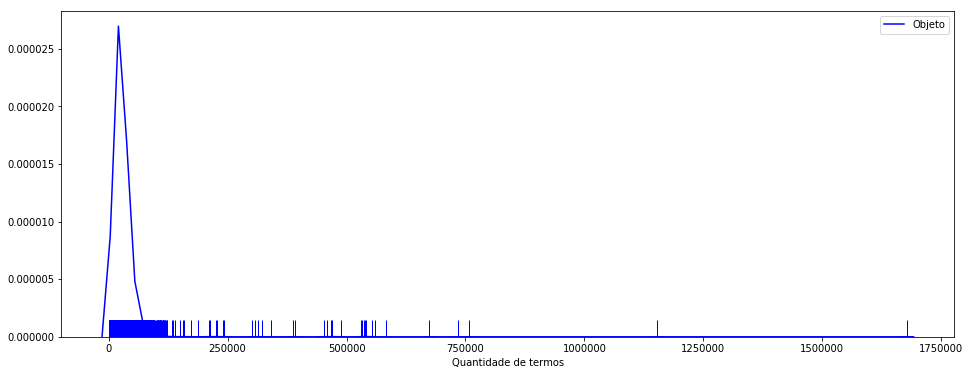

In [12]:
fig, ax = plt.subplots(figsize=(16,6))
ax.set_xlabel("Quantidade de termos")
sns.distplot(doc_lengths, hist=False, rug=True, label="Objeto", color='b')

In [14]:
enSW = set(stopwords.words('english'))

In [41]:
def remove_stop_words(text):
    return ' '.join([word for word in text.split() if word.lower() not in enSW and len(word.lower()) > 1])

In [42]:
data_without_sw = [remove_stop_words(doc) for doc in data]

In [43]:
freq = pd.Series(' '.join(data_without_sw).split()).value_counts()

In [44]:
def word_frequency_barplot(freq, nr_top_words=50):
    
    fig, ax = plt.subplots(1,1,figsize=(20,5))
    sns.barplot(list(range(nr_top_words)), freq.values[:nr_top_words], palette='hls', ax=ax)
    ax.set_xticks(list(range(nr_top_words)))
    ax.set_xticklabels(freq.index[:nr_top_words], fontsize=14, rotation=90)
    
    return ax

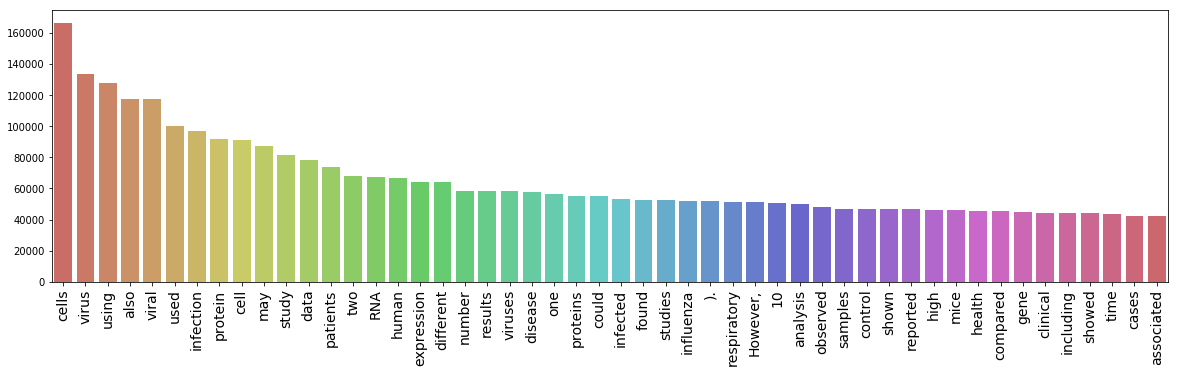

In [45]:
ax = word_frequency_barplot(freq)

In [46]:
skipgram_settings = {
    'name': 'sgns',
    'size':200,
    'window_size':8,
    'min_count':2,
    'workers':6,
    'sg':1,
    'hs':0,
    'negative':15,
    'ns_exponent':0.75,
    'learning_rate':0.01,
    'min_learning_rate':0.0001,
    'epochs':30,
    'sample':pow(10,-4)
}

In [47]:
settings = skipgram_settings

In [48]:
corpus = [d.split() for d in data]

In [49]:
model = Word2Vec(corpus, 
                 size=settings['size'], 
                 window=settings['window_size'], 
                 min_count=settings['min_count'], 
                 workers=settings['workers'], 
                 sg=settings['sg'], 
                 hs=settings['hs'], 
                 negative=settings['negative'],
                 ns_exponent=settings['ns_exponent'], 
                 alpha=settings['learning_rate'],
                 min_alpha=settings['min_learning_rate'],
                 iter=settings['epochs'], 
                 sample=settings['sample']
                )
model.save('models/sgns_200.model')